In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [40]:
df = pd.read_csv("housing.csv")

print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [41]:
print(df.info())

print(df.describe())

print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

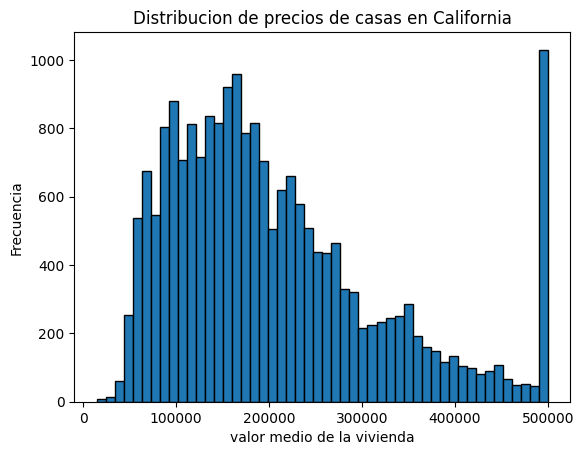

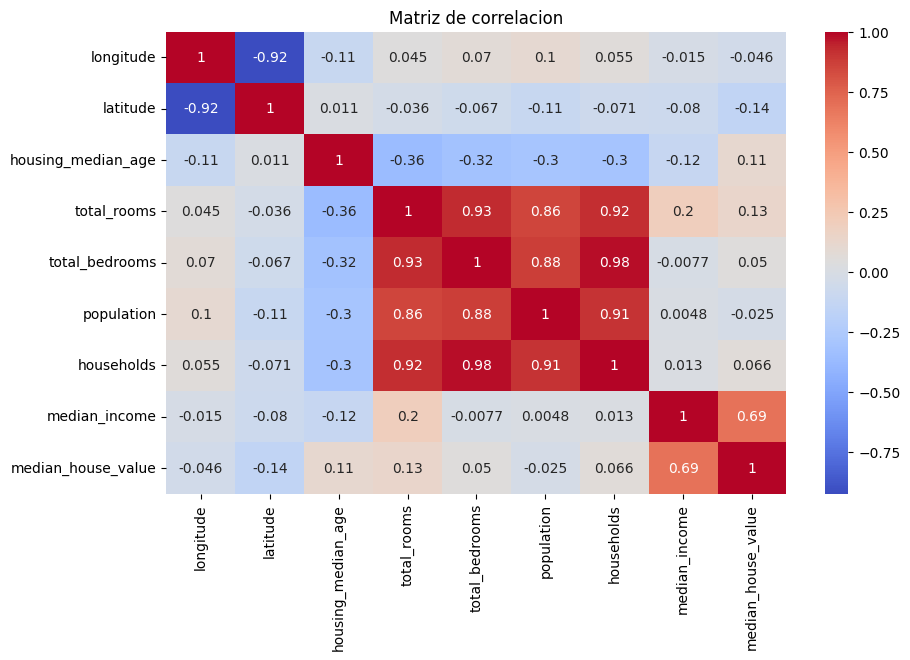

In [42]:
plt.hist(df["median_house_value"], bins=50, edgecolor="black")
plt.xlabel("valor medio de la vivienda")
plt.ylabel("Frecuencia")
plt.title("Distribucion de precios de casas en California")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlacion")
plt.show()

In [43]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [44]:
X = pd.get_dummies(X, columns=["ocean_proximity"], drop_first=True)

print(X.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity_INLAND  \
0       322.0       126.0         8.3252                   False   
1      2401.0      1138.0         8.3014                   False   
2       496.0       177.0         7.2574                   False   
3       558.0       219.0         5.6431                   False   
4       565.0       259.0         3.8462                   False   

   ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                      True   
1                   False     

In [45]:
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño test:", X_test.shape)

Tamaño entrenamiento: (16512, 12)
Tamaño test: (4128, 12)


In [46]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

In [64]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluacion del modelo de Regresion Lineal")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R²: ", r2)

Evaluacion del modelo de Regresion Lineal
MAE:  50670.73824097193
MSE:  4908476721.156617
RMSE:  70060.5218447352
R²:  0.6254240620553605


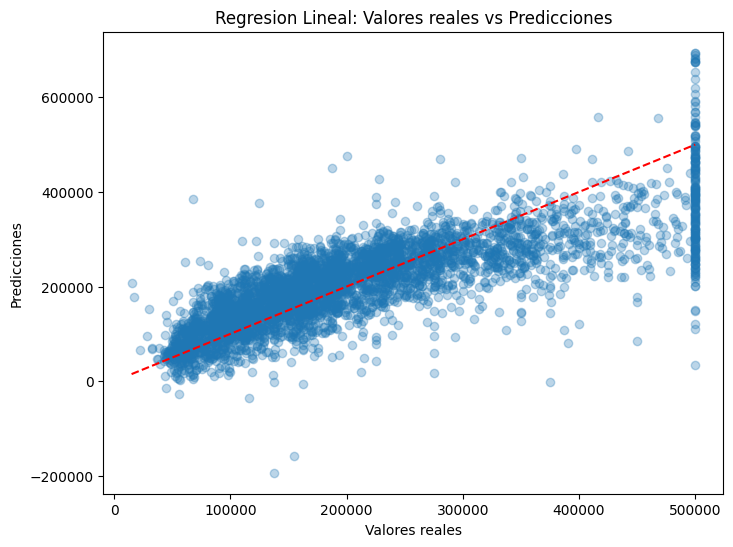

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresion Lineal: Valores reales vs Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

In [52]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]
X = pd.get_dummies(X, columns=["ocean_proximity"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [61]:
tree_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(random_state=42))
])

tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Arbol de Decision")
print("MAE: ", mae_tree)
print("RMSE: ", rmse_tree)
print("R²: ", r2_tree)

Arbol de Decision
MAE:  44174.28948643411
RMSE:  69777.04463667431
R²:  0.6284491300750707


In [62]:
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluación
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R²:", r2_rf)

Random Forest
MAE: 31629.76891472868
RMSE: 49007.29113988663
R²: 0.816720228207404


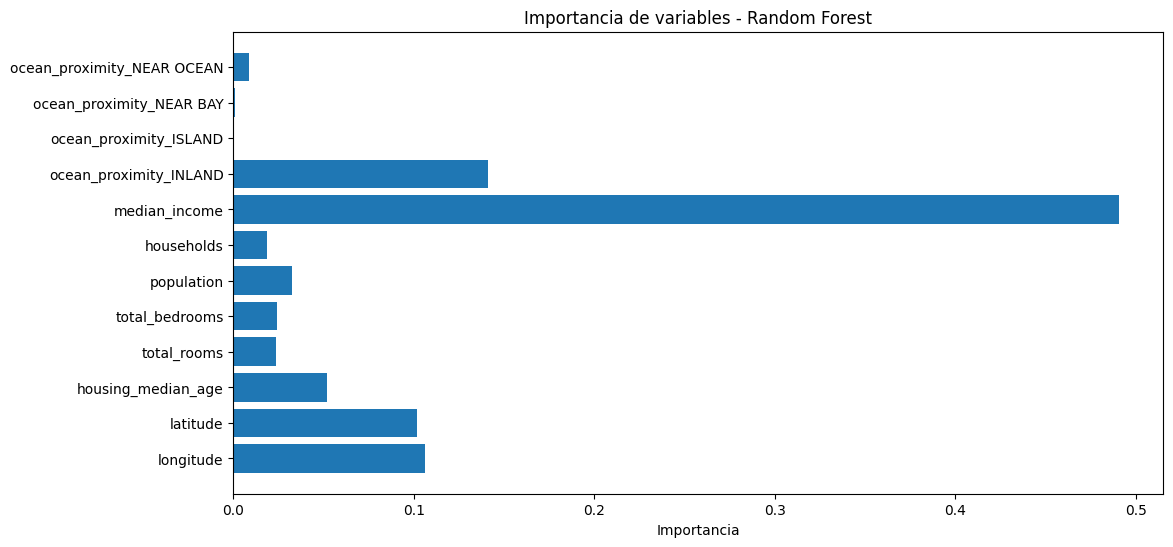

In [63]:
importances = rf_pipeline.named_steps['model'].feature_importances_
features = X_train.columns

plt.figure(figsize=(12, 6))
plt.barh(features, importances)
plt.xlabel("Importancia")
plt.title("Importancia de variables - Random Forest")
plt.show()